<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML/Assignment/ProgAssmt1_student_CH24M571.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [14]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    # same known co-variance
    # getting the mean for positive and negative classes

    u_positive = np.mean(X_train[Y_train == 1], axis=0)
    u_negative = np.mean(X_train[Y_train == -1], axis=0)

    # Mean of features where Y_train is 1 and -1 respectively

    # calculating the prior probabilities
    PY_1positive = np.sum(Y_train == 1) / len(Y_train)  # Proportion of data points with Y_train = 1
    PY_1negative = 1 - PY_1positive # Proportion of data points with Y_train = -1

    # storing the predictions

    Y_test_pred = np.zeros(X_test.shape[0])  # Initialize array to store predictions
    for i, x_test in enumerate(X_test):

        # Calculates the likelihood of the test data point belonging to the positive class, assuming a normal distribution with mean u_positive and identity covariance.
        likelihood_positive = np.exp(-0.5 * np.sum((x_test - u_positive)**2))
        likelihood_negative = np.exp(-0.5 * np.sum((x_test - u_negative)**2))

        # Calculate posterior probabilities (avoiding division by zero):
        # P(Y=1|X) = P(X|Y=1) * P(Y=1)
        posterior_pos = likelihood_positive * PY_1positive
        posterior_neg = likelihood_negative * PY_1negative   # P(Y=-1|X) = P(X|Y=-1) * P(Y=-1)

        # Assigning the predicted label:
        Y_test_pred[i] = 1 if posterior_pos >= posterior_neg else -1

    return Y_test_pred

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

    # same unknown covariance

    # Calculating means for each class
    u_positive = np.mean(X_train[Y_train == 1], axis=0)
    u_negative = np.mean(X_train[Y_train == -1], axis=0)

    # Calculating the shared covariance matrix
    # a shared covariance matrix (cov) is calculated from the entire training data.
    cov = np.cov(X_train, rowvar=False)

    # Handle singular covariance matrix (add small regularization)
    if np.linalg.cond(cov) > 1e10:  # Check for ill-conditioned matrix
        cov += np.eye(cov.shape[0]) * 1e-6

    # Calculate prior probabilities
    PY_1positive = np.sum(Y_train == 1) / len(Y_train)
    PY_1negative = 1 - PY_1positive

    # Make predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    inv_cov = np.linalg.inv(cov)
    for i, x_test in enumerate(X_test):
        # Calculate likelihoods (using shared covariance)
        likelihood_pos = np.exp(-0.5 * (x_test - u_positive).T @ inv_cov @ (x_test - u_positive))
        likelihood_neg = np.exp(-0.5 * (x_test - u_negative).T @ inv_cov @ (x_test - u_negative))

        # Calculate posterior probabilities (avoiding division by zero)
        posterior_pos = likelihood_pos * PY_1positive
        posterior_neg = likelihood_neg * PY_1negative

        # Assign predicted label
        Y_test_pred[i] = 1 if posterior_pos >= posterior_neg else -1

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    # different unknown covariance

    # Calculating means and covariances for each class
    u_positive = np.mean(X_train[Y_train == 1], axis=0)
    u_negative = np.mean(X_train[Y_train == -1], axis=0)
    cov_positive = np.cov(X_train[Y_train == 1], rowvar=False)
    cov_negative = np.cov(X_train[Y_train == -1], rowvar=False)

    # # Handle singular covariance matrices (add small regularization)
    # if np.linalg.cond(cov_pos) > 1e10:
    #     cov_pos += np.eye(cov_pos.shape[0]) * 1e-6
    # if np.linalg.cond(cov_neg) > 1e10:
    #     cov_neg += np.eye(cov_neg.shape[0]) * 1e-6

    # Calculate prior probabilities
    PY_pos = np.sum(Y_train == 1) / len(Y_train)
    PY_neg = 1 - PY_pos

    # Make predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    inv_cov_pos = np.linalg.inv(cov_positive)
    inv_cov_neg = np.linalg.inv(cov_negative)
    for i, x_test in enumerate(X_test):
        # Calculate likelihoods (using separate covariances)
        likelihood_pos = np.exp(-0.5 * (x_test - u_positive).T @ inv_cov_pos @ (x_test - u_positive)) / np.sqrt(np.linalg.det(cov_positive))
        likelihood_neg = np.exp(-0.5 * (x_test - u_negative).T @ inv_cov_neg @ (x_test - u_negative)) / np.sqrt(np.linalg.det(cov_negative))

        # Calculate posterior probabilities (avoiding division by zero)
        posterior_pos = likelihood_pos * PY_pos
        posterior_neg = likelihood_neg * PY_neg

        # Assign predicted label
        Y_test_pred[i] = 1 if posterior_pos >= posterior_neg else -1

    return Y_test_pred






In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




In [ ]:
# to be removed
Y_pred_test_1a , Y_pred_test_1b , Y_pred_test_1c


(array([ 1.,  1.,  1., ...,  1., -1., -1.], shape=(2000,)),
 array([ 1.,  1.,  1., ...,  1., -1., -1.], shape=(2000,)),
 array([ 1.,  1.,  1., ...,  1., -1., -1.], shape=(2000,)))

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

# files = ['../../Data/dataset1_1.npz', '../../Data/dataset1_2.npz', '../../Data/dataset1_3.npz']
files = ['./dataset1_1.npz', './dataset1_2.npz', './dataset1_3.npz']

train_features = []
train_labels = []
test_features = []
test_labels = []




** Cell type : TextWrite **
(Write your observations and table of errors here)




** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """








In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)



** Cell type : TextWrite **
(Write your observations and table of errors here)



In [ ]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




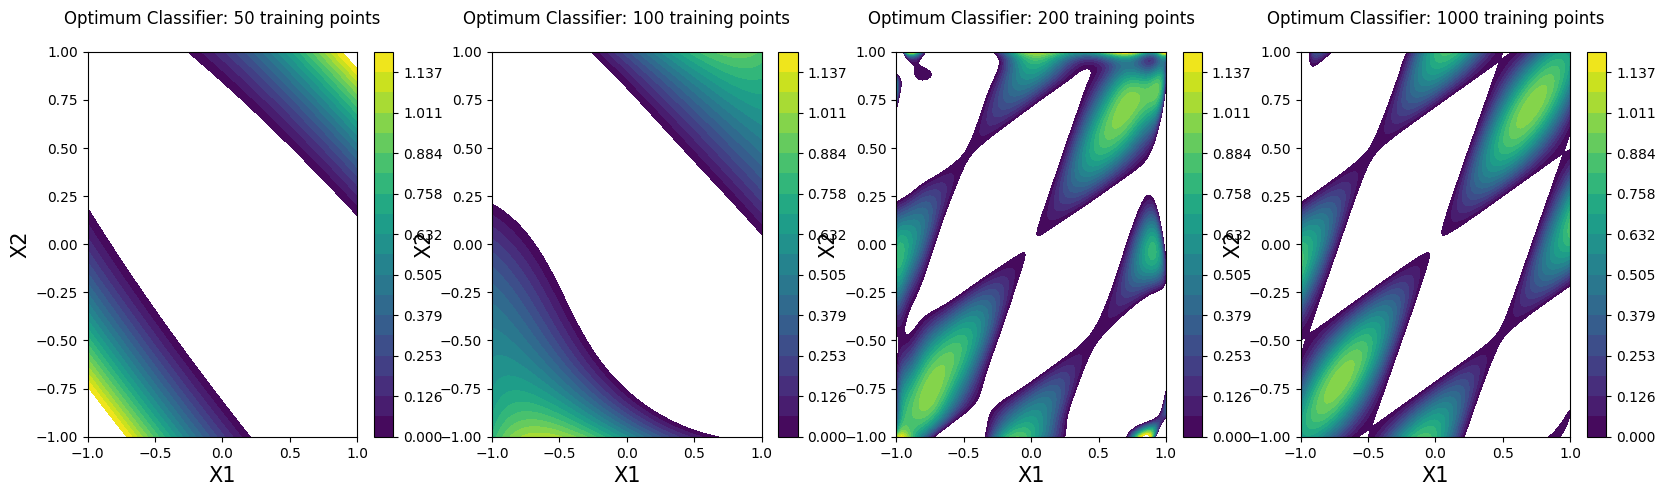

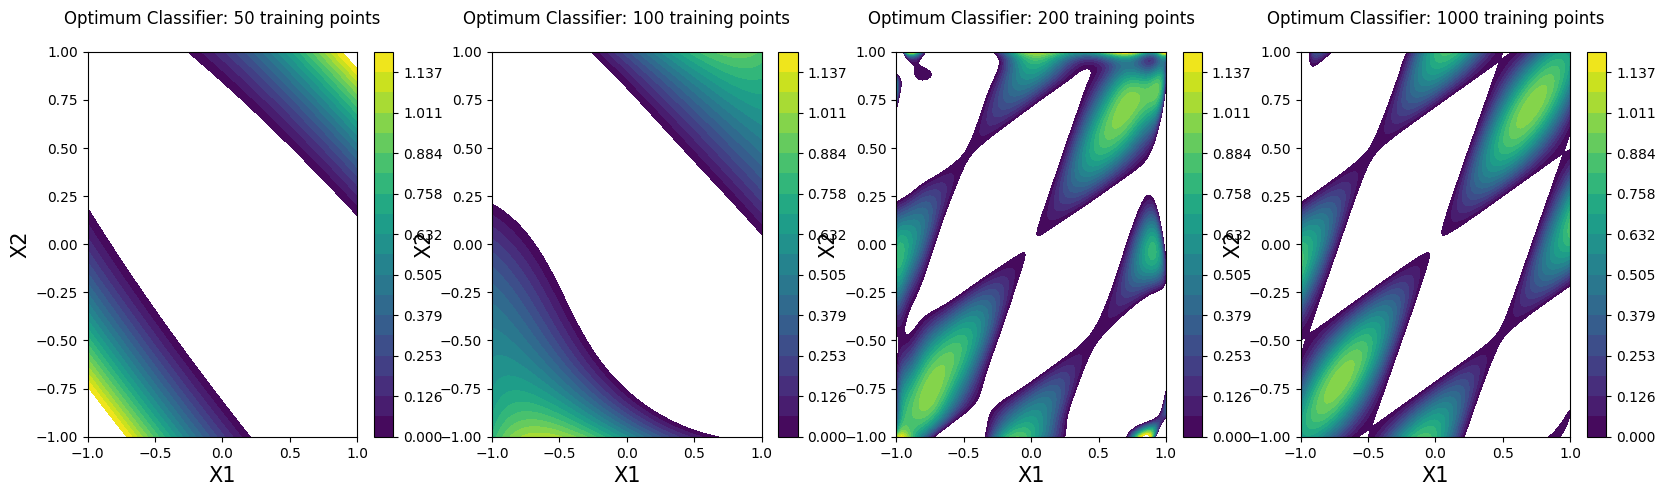

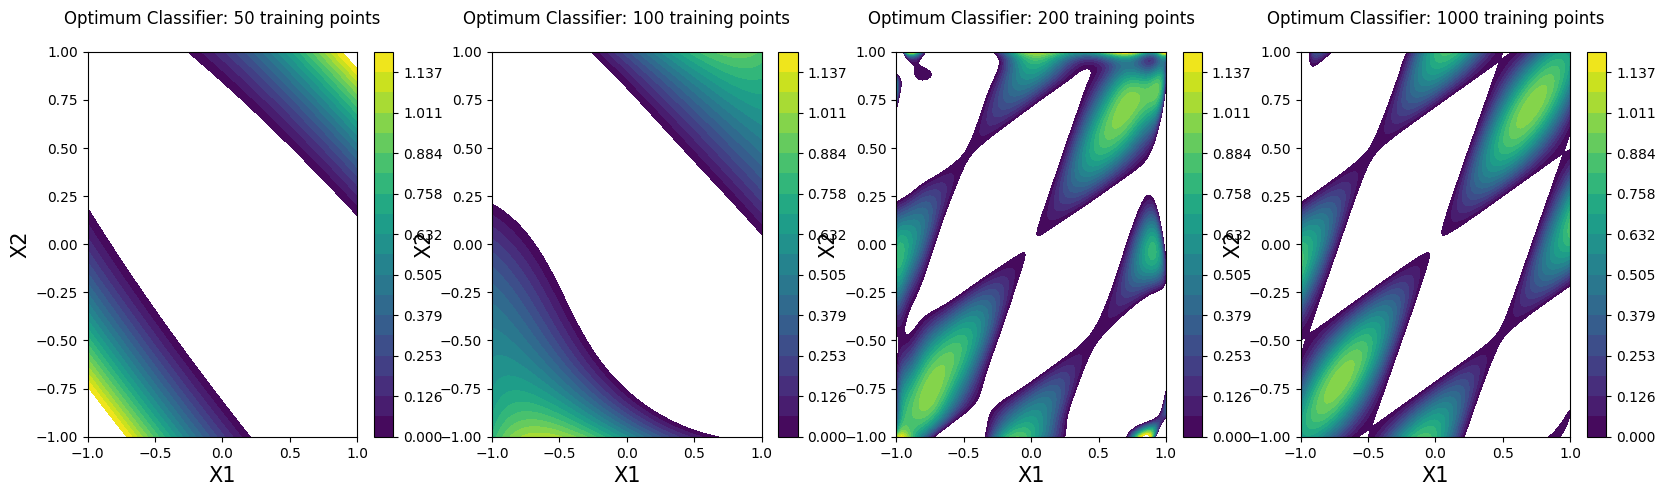

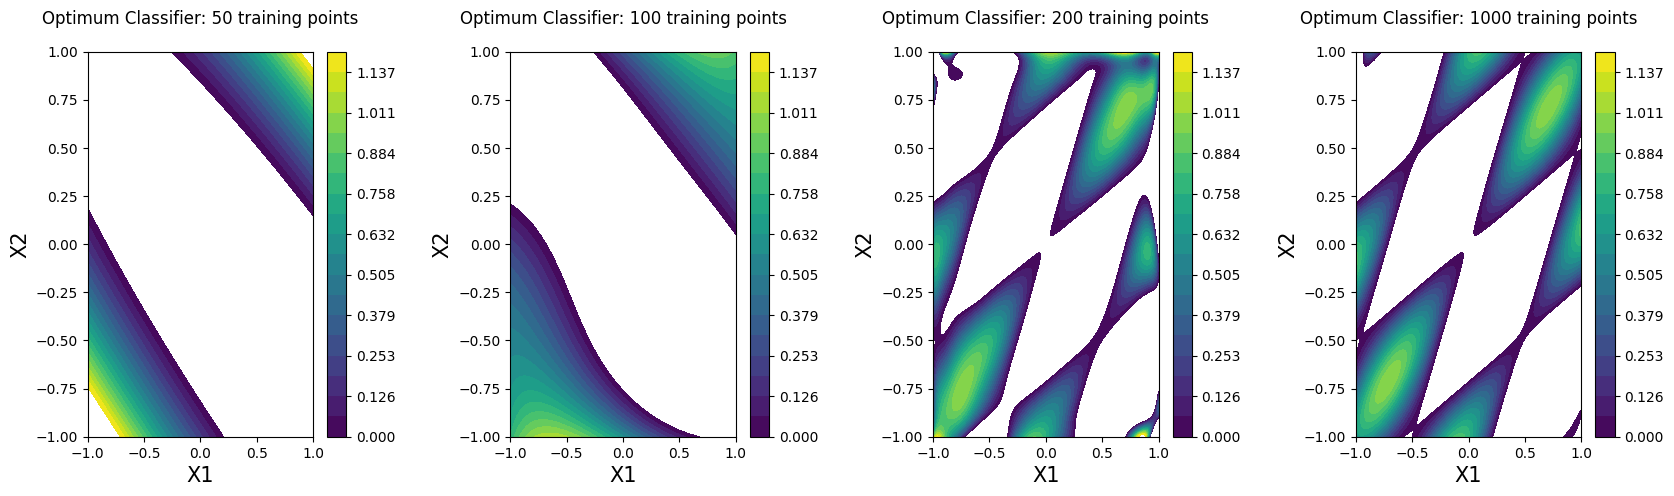

In [20]:
# Cell type : CodeWrite
#
def plot_ridge_regress_train(X_train, Y_train, degree=1, reg_param=0.01):
    """Trains a ridge regression model using the given data
        @returns w a 1D numpy array of shape (n_features,) containing the learned model parameters
    """

    # Generate polynomial features manually
    num_samples = X_train.shape[0]
    num_features = int((degree + 1) * (degree + 2) / 2)  # Calculate number of features

    phi = np.ones((num_samples, num_features))  # Initialize feature matrix

    col_index = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            phi[:, col_index] = (X_train[:, 0] ** i) * (X_train[:, 1] ** j)
            col_index += 1

    # Calculate weight vector using ridge regression formula
    K = phi.T @ phi
    I = np.eye(num_features)
    w = np.linalg.solve(K + reg_param * I, phi.T @ Y_train)

    return w

######################################################################

def plot_ridge_regress_predict(X_test, wt_vector, degree=1):
    """Predicts output targets using the previously trained model and NumPy."""

    # Generate polynomial features for test data
    num_samples = X_test.shape[0]
    num_features = int((degree + 1) * (degree + 2) / 2)  # Calculate number of features

    phi = np.ones((num_samples, num_features))  # Initialize feature matrix

    col_index = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            phi[:, col_index] = (X_test[:, 0] ** i) * (X_test[:, 1] ** j)
            col_index += 1

    # Predict using the calculated weight vector
    Y_test_pred = phi @ wt_vector

    return Y_test_pred

##########################################################################

def visualize_polynomial_contour(weights, poly_degree, title=""):
    """
    Plots a 2D contour map of the polynomial function defined by the given weights and degree.
    Expectation : Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels
    """
    grid_x = np.linspace(-1, 1, 200)
    grid_y = np.linspace(-1, 1, 200)
    X, Y = np.meshgrid(grid_x, grid_y)

    Z_values = np.zeros_like(X)

    for row_idx, _ in enumerate(X):
        input_points = np.column_stack((X[row_idx, :], Y[row_idx, :]))
        Z_values[row_idx, :] = plot_ridge_regress_predict(input_points, weights, poly_degree)

    # plt.figure()
    plt.contourf(X, Y, Z_values, levels=np.linspace(0., 1.2, 20), cmap='viridis')
    plt.colorbar()
    plt.title(title)
    # plt.show()

    ####################################################################
def generate_mse_matrices(degrees, regularization_values):
    """
    Creates a list of zero-filled 2D numpy arrays to store mean squared errors.

    Args:
        degrees (list): A list of integers specifying the polynomial degrees to be used.
        regularization_values (list): A list of floats specifying the regularization parameters to be used.

    Returns:
        mse_matrices (list): A list of 2D numpy arrays of shape (len(degrees), len(regularization_values)) filled with zeros.
    """
    return [np.zeros((len(degrees), len(regularization_values))) for _ in range(8)]

    #########################################################################

def train_and_evaluate_ridge(X_train, Y_train, X_test, Y_test, poly_degree, reg_param):
    """
    Trains a ridge regression model using the given training data and regularization parameter,
    then computes the predicted output, weight vector, and mean squared error (MSE) using the test data.

    Takes the following arguments :
        X_train (ndarray): Training input features (shape: (n_train_samples, 2)).
        Y_train (ndarray): Training output targets (shape: (n_train_samples,)).
        X_test (ndarray): Test input features (shape: (n_test_samples, 2)).
        Y_test (ndarray): True test output targets (shape: (n_test_samples,)).
        poly_degree (int): Polynomial degree for feature transformation.
        reg_param (float): Regularization parameter for ridge regression.

    Returns:
        weight_vector (ndarray): Learned model parameters (shape: (n_features,)).
        predicted_Y (ndarray): Predicted output targets for the test set (shape: (n_test_samples,)).
        mse (float): Mean squared error between predicted and true test targets.
    """
    weight_vector = plot_ridge_regress_train(X_train, Y_train, poly_degree, reg_param)
    predicted_Y = plot_ridge_regress_predict(X_test, weight_vector, poly_degree)
    mse = np.mean((predicted_Y - Y_test) ** 2)

    return weight_vector, predicted_Y, mse

###############################################################################

def plot_polynomial_classifier(subplot_position, weight_vector, training_size, title_padding, font_size, polynomial_degree):
    """
    Plots a 2D polynomial classifier visualization for the given weight vector, polynomial degree,
    and training sample size at the specified subplot position.

    Args:
        subplot_position (int): Position index in the 1x4 grid of subplots.
        weight_vector (ndarray): Learned model parameters (shape: (n_features,)).
        training_size (int): Number of training samples used to train the model.
        title_padding (float): Padding distance of the subplot title from the top in points.
        font_size (int): Font size for x and y axis labels.
        polynomial_degree (int): Polynomial degree used in the model.

    Returns:
        None.
    """
    # Create a single figure with subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns of subplots

    # Plot classifier results
    for idx, (opt_wt, size, deg, ax) in enumerate(zip(opt_weight_vectors, training_sizes, optimal_degrees, axes), start=1):
        plt.sca(ax)  # Set the current subplot
        visualize_polynomial_contour(opt_wt, deg, title=f"Optimum Classifier: {size} training points")
        plt.title(f"Optimum Classifier: {size} training points", pad=20)
        plt.xlabel('X1', fontsize=15)
        plt.ylabel('X2', fontsize=15)

def display_mse_results(*mse_values):
    """
    Prints the mean squared errors (MSEs) for different test and training dataset sizes.

    Args:
        mse_values (tuple of ndarrays): MSEs for test and training datasets with different numbers of points.
    """
    dataset_sizes = [50, 100, 200, 1000]
    print("MSE for different dataset sizes:")
    print("--------------------------------")
    for i, size in enumerate(dataset_sizes):
        print(f"{size} Points - TEST Dataset:\n {mse_values[i]}")
        print(f"{size} Points - TRAIN Dataset:\n {mse_values[i+4]}")
########################### func definations end here ####################

data = np.load('./dataset3_1.npz')
# data = np.load('../../Data/dataset3_1.npz')

X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# given values
degree_values = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

# Define subsets of training data with different sample sizes
training_sizes = [50, 100, 200, 1000]
training_subsets = [(X_train[:size, :], Y_train[:size]) for size in training_sizes]

# Initialize MSE matrices
mse_matrices = generate_mse_matrices(degree_values, reg_params)
MSE_test = mse_matrices[:4]
MSE_train = mse_matrices[4:]

# Compute MSE for all combinations of degree and regularization
for i, degree in enumerate(degree_values):
    for j, reg_param in enumerate(reg_params):
        for k, (X_subset, Y_subset) in enumerate(training_subsets):
            MSE_test[k][i, j] = train_and_evaluate_ridge(X_subset, Y_subset, X_test, Y_test, degree, reg_param)[2]
            MSE_train[k][i, j] = train_and_evaluate_ridge(X_subset, Y_subset, X_train, Y_train, degree, reg_param)[2]

# Compute optimal weight vectors for different datasets
optimal_degrees = [2, 4, 16, 16]
optimal_regs = [1e-1, 1e-7, 1e-9, 1e-9]
opt_weight_vectors = [plot_ridge_regress_train(X, Y, d, r) for (X, Y), d, r in zip(training_subsets, optimal_degrees, optimal_regs)]

# Plot classifier results
plt.rcParams['figure.figsize'] = [30, 8]
# fig = plt.figure()
for idx, (opt_wt, size, deg) in enumerate(zip(opt_weight_vectors, training_sizes, optimal_degrees), start=1):
    plot_polynomial_classifier(idx, opt_wt, size, title_padding=20, font_size=15, polynomial_degree=deg)

plt.subplots_adjust(wspace=0.50) # Adjust spacing between subplots
plt.show()

# Uncomment the line below to print MSE values if needed
# display_mse_results(*MSE_test, *MSE_train)


# #################################### test  - TO BE REMOVED
# import pandas as pd
# def create_mse_table(mse_matrix):
#     return pd.DataFrame(mse_matrix, index=degree_values, columns=reg_params)

# # Create tables for train and test errors:
# for size, test_mse, train_mse in zip(training_sizes, MSE_test, MSE_train):
#     print(f"Training Size: {size}")
#     print("Test Error:")
#     display(create_mse_table(test_mse))
#     print("Train Error:")
#     display(create_mse_table(train_mse))
#     print("\n")



Findings of Question 3 :

-  With greater polynomial degree training error comes down but test error seems to go high , which means overfitting with the training data . Regularization helps to penalize overfitting by penalizing large weights and improving generalization

- training size decreases =  both train and test error decreases , larger data = more information for the model to learn from leading to more generalization opportunities
- we have bias variance trade off : Simple models (low degree, high regularization) have higher bias but lower variance, while complex models (high degree, low regularization) have lower bias but higher variance.

1. 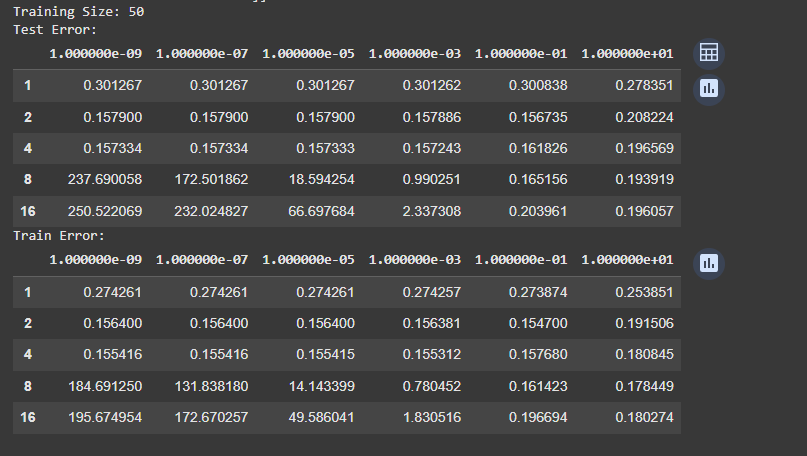

----------------------------------------------
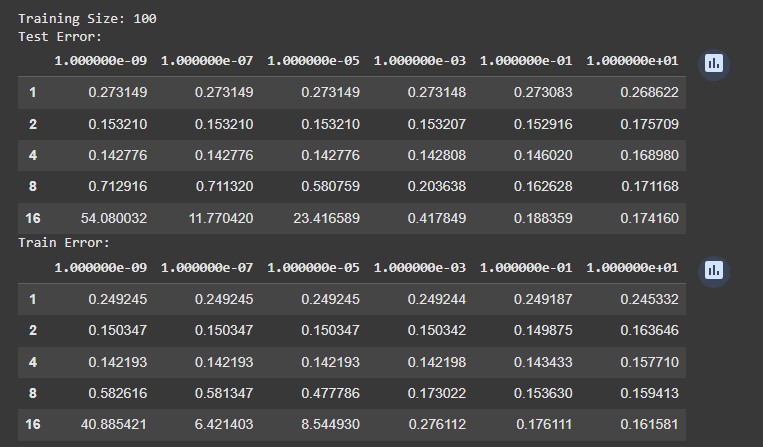
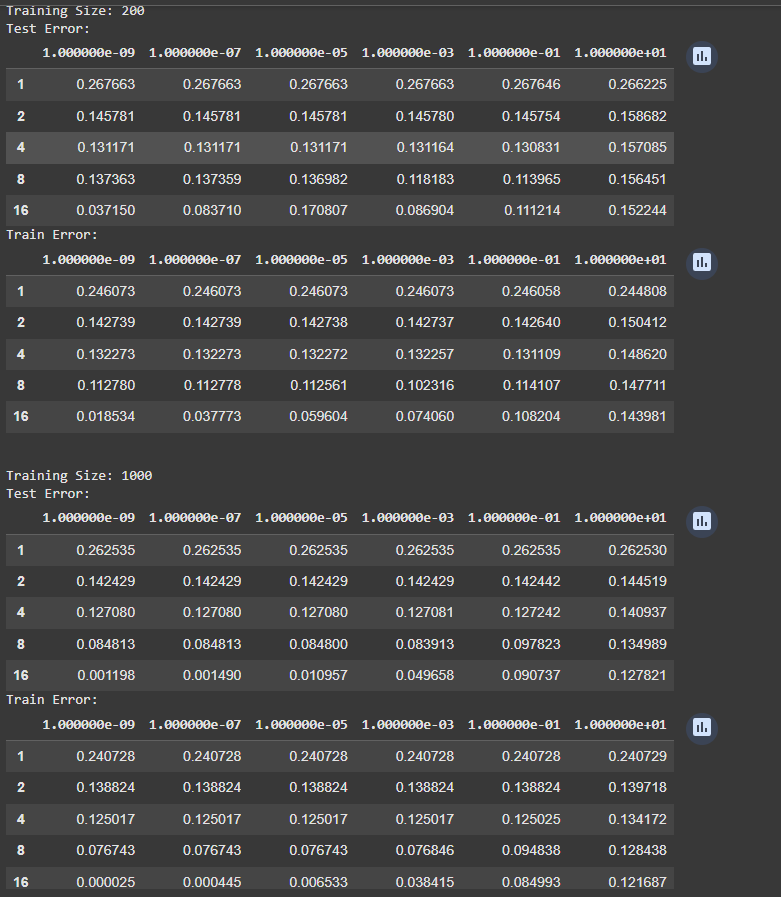



**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











In [ ]:
# Cell type : CodeWrite


** Cell type : TextWrite **

**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [ ]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100):
    """
    Arguments:
    X : (n,d) shape numpy array
    Y : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    kernel = 'linear' or 'rbf' or 'poly'
    reg_param = $\lambda$
    num_iter_gd = number of GD iterations.

    Returns the result of kernel logistic regression :
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    Primal problem:
    $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    the dual of which is

    $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    where $\phi$ is the feature got by the kernel.

    Where K is the nxn kernel matrix computed on the training data.

    The kernel is defined by the kernel_param:
    If kernel=linear: K(\u,\v) = \u^\top \v
    If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    """

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """






In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.



TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  




In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6



**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """


def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""





In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  



In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2




**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier.
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1,
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y.
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """


def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and
    returns the tree predicted values at those instances."""




In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.



TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


In [ ]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)


In [ ]:
# Codewrite cell
# Plots for iteration vs error here


In [ ]:
# Codewrite cell
# Plots for illustrating the classifier here


Textwrite cell:

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [ ]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [ ]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w


In [ ]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set

#Textwrite cell:
